# Arbitrum Airdrop Analysis

Note: This code uses part of my code publicly avaiable at: https://github.com/johnnatan-messias/chainlink-data-feed-crawler

In [1]:
from arbiscan_api import ArbiscanAPI
import os
import json
import gzip
import pickle
import pandas as pd
pd.set_option('display.precision', 18)
pd.set_option('max_colwidth', None)


In [2]:
plots_dir = './plots/'
data_dir = './data/'
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)


In [3]:
arb_decimals = 1e18


## Data gathering Arbiscan Data
The code in this section is used to gather data from the Arbiscan API. The data collection is from Arbitrum Foundation: Token Distributor (0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9) contract that was deployed at block number 70506643.

As gathering data from Arbiscan API is realy slow due to its API rate limit of 5 requests per second, I consider gathering events from Mar-16-2023 (block number 70506643) to Apr-16-2023 (block number 81006643) -- One month of data.

In total, I was able to gather 1,186,930 events from the Arbiscan API, as the following.

|Event name| # of events | Description |
|---|---|---|
|CanClaim | 621,343 (52.35%) |This event is was trigerred to indicate that an address is eligible for claiming ARB tokens.|
|HasClaimed | 565,583 (47.65%) |This event is triggered when the owner of one of the eligible addresses claim their ARB tokens.|
|OwnershipTransferred |3| -- |
|SweepReceiverSet | 1| -- |

In [2]:
arbiscan_api_key = os.environ["ARBISCAN_API_KEY"]
arbitrum_airdrop_contract_address = "0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9"
# Arbitrum Foundation: Token Distributor contract was deployed at block number 70506643
block_start = 70506643  # Mar-16-2023 07:37:09 PM +UTC
block_end = 70506643 + 10500000  # Apr-16-2023 09:27:27 AM +UTC
print("There are {} blocks to process".format(block_end - block_start))
print("Blocks range: {} -- {}".format(block_start, block_end))


There are 10500000 blocks to process
Blocks range: 70506643 -- 81006643


In [3]:
api = ArbiscanAPI(arbiscan_api_key=arbiscan_api_key)


In [4]:
# api.get_logs(contract_address=arbitrum_airdrop_contract_address,
#              from_block=block_start, to_block=block_end)


In [ ]:
# The API rate limit is 5 requests per second and it was exceeded for the queries below. For simplicity, let's ignore them for now.
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=71116543&toBlock=71116642&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=71313143&toBlock=71313242&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=72460343&toBlock=72460442&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=73905343&toBlock=73905442&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=74047443&toBlock=74047542&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=74072043&toBlock=74072142&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=75367743&toBlock=75367842&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=75596943&toBlock=75597042&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=77291443&toBlock=77291542&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=79345943&toBlock=79346042&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=79571843&toBlock=79571942&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=79680443&toBlock=79680542&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=79764643&toBlock=79764742&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=80131643&toBlock=80131742&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))
# Max retries exceeded with url: /api?module=logs&action=getLogs&address=0x67a24CE4321aB3aF51c2D0a4801c3E111D88C9d9&fromBlock=80659943&toBlock=80660042&page=1&offset=10000&apikey=YE8Q5X384FIG8PURGASNVK6YTWGGZBB2QQ (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1129)')))


In [ ]:
logs_data = api.get_logs_in_batches(contract_address=arbitrum_airdrop_contract_address,
                                    from_block=block_start, to_block=block_end, batch_size=100)
print("There are {} logs collected".format(len(logs_data)))
# with gzip.open(data_dir+'logs_data.json.gz', 'wt') as fout:
#     json.dump(logs_data, fout)


In [8]:
with gzip.open(data_dir+'event_logs.pickle.gz', 'wb') as fout:
    pickle.dump(logs_data, fout)


## Parsing the data set
This section is used to parse the data set gathered from Arbiscan API. The data set is parsed to a CSV compressed file in a GZIP format, which is used in the Exploratory Data Analysis section to analyze the data set.

In [6]:
with gzip.open(data_dir+'event_logs.pickle.gz', 'rb') as fin:
    logs_data = pickle.load(fin)
print("There are {} logs collected".format(len(logs_data)))


There are 105000 logs collected


In [7]:
ts = list()
for log in logs_data:
    if 'result' in log:
        ts += list(map(lambda x: x['topics'][0], log['result']))
ts = set(ts)
print("There are {} unique topics".format(len(ts)))
ts


There are 4 unique topics


{'0x8629b200ebe43db58ad688b85131d53251f3f3be4c14933b4641aeebacf1c08c',
 '0x87aeeb9eda09a064caef63d00f62c15063631980bfc422ad7dd30c8a79f0cbb7',
 '0x8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0',
 '0xbea8251f76064f657f2a744bf08a1b5700486d06eb94922162892eb022d95ef6'}

In [8]:
topics_distributor = {
    "0x8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0": "OwnershipTransferred",
    "0xbea8251f76064f657f2a744bf08a1b5700486d06eb94922162892eb022d95ef6": "SweepReceiverSet",
    "0x87aeeb9eda09a064caef63d00f62c15063631980bfc422ad7dd30c8a79f0cbb7": "CanClaim",
    "0x8629b200ebe43db58ad688b85131d53251f3f3be4c14933b4641aeebacf1c08c": "HasClaimed",
}

topics_arb = {
    "0x3134e8a2e6d97e929a7e54011ea5485d7d196dd5f0ba4d4ef95803e8e3fc257f": "DelegateChanged",
    "0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef": "Transfer",
    "0xdec2bacdd2f05b59de34da9b523dff8be42e5e38e818c82fdb0bae774387a724": "DelegateVotesChanged",
}


In [9]:
def dec_to_hex(dec):
    return hex(dec)


def hex_to_dec(hex_str):
    return int(hex_str, 16)


def parse_event_logs(events):
    events_parsed = list()
    for log in events:
        event = dict()
        event['contract_address'] = log['address']
        event['event_type'] = topics_distributor[log['topics'][0]]
        event['account'] = '0x' + log['topics'][1][26:]
        event['tokens'] = hex_to_dec(
            log['data'])/arb_decimals if log['data'] != '0x' else None
        event['blockNumber'] = hex_to_dec(log['blockNumber'])
        event['blockHash'] = log['blockHash']
        event['timeStamp'] = pd.to_datetime(
            hex_to_dec(log['timeStamp']), unit='s')
        event['gasPrice'] = hex_to_dec(log['gasPrice'])
        event['gasUsed'] = hex_to_dec(log['gasUsed'])
        event['logIndex'] = hex_to_dec(
            log['logIndex']) if log['logIndex'] != '0x' else None
        event['transactionHash'] = log['transactionHash']
        event['transactionIndex'] = hex_to_dec(log['transactionIndex'])
        events_parsed.append(event)
    return events_parsed


In [10]:
events = list()
for event in logs_data:
    if 'result' in event:
        events += parse_event_logs(event['result'])
print("There are {} events collected".format(len(events)))


There are 1186930 events collected


In [11]:
df = pd.DataFrame(events)
print("There are {} events collected".format(len(df)))
df.head()


There are 1186930 events collected


,contract_address,event_type,account,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex
0,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x0000000000000000000000000000000000000000,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,NaN,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
1,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,SweepReceiverSet,0xbfc1feca8b09a5c5d3effe7429ebe24b9c09ef58,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,2.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
2,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x2b9acfd85440b7828db8e54694ee07b2b056b30c,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,3.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
3,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,3.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2
4,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xf7b04982840d90a7634f41851815f0153a494a4f,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,4.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2


In [12]:
def load_addresses():
    with open(data_dir+'addresses.json', 'r') as file:
        top_addresses_dict = json.load(file)

    print("There are {} addresses in the dictionary".format(
        len(top_addresses_dict)))
    return top_addresses_dict


In [13]:
# Addresses already identified can be added to the json file ./data/addresses.json
addresses_dict = load_addresses()


There are 3191 addresses in the dictionary


In [14]:
# df['account_tag'] = df['account'].replace(
#     addresses_dict)
# df['account_tag_short'] = df.apply(
#     lambda x: x['account'][:6] + ' ... ' + x['account'][-4:] if x['account'] == x['account_tag'] else x['account_tag'], axis=1)


In [15]:
df.head()


,contract_address,event_type,account,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex
0,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x0000000000000000000000000000000000000000,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,NaN,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
1,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,SweepReceiverSet,0xbfc1feca8b09a5c5d3effe7429ebe24b9c09ef58,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,2.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
2,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x2b9acfd85440b7828db8e54694ee07b2b056b30c,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,3.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1
3,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,3.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2
4,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xf7b04982840d90a7634f41851815f0153a494a4f,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,4.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2


In [16]:
df.to_csv(data_dir+'event_logs.csv.gz',
          index=False, compression='gzip', sep=';')


## Gathering ENS data
For most projects, knowing the identity or ownership of public wallet addresses is crucial. Therefore, here I gathered information of ENS domains recorded on the Ethereum blockchain through an archive node.

From a total of 624,739 addresses in our Arbitrum data set, I was able to find 95,578 unique addresses that have an ENS domain registered on the Ethereum blockchain. These addresses are persisted in the ./data/addresses_dic.json.gz file.

Further, I collected a list of the ownership of 3191 addresses from  the Etherscan API (top ETH holders), Compound website, and Sybil-List to compose our data of inferred addresses. These addresses are persisted in the json ./data/addresses.json file. However, we're not going to use them in this analysis but it shows that the code is ready for future projects. More details are available at section 4 of the following paper https://arxiv.org/pdf/2305.17655.pdf


In [146]:
df = pd.read_csv(data_dir+'event_logs.csv.gz', sep=';')
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [147]:
from web3 import Web3
from ethereum import *

eth_node = os.environ['ETHEREUM_NODE_URL']
w3 = Web3(Web3.HTTPProvider(eth_node))
# w3.isConnected()
print("The most recent block number in the node's chain is", w3.eth.blockNumber)
# w3.net.listening


The most recent block number in the node's chain is 17509177


In [148]:
ens_contract_address = "0x3671ae578e63fdf66ad4f3e12cc0c0d71ac7510c"
# 0x253553366Da8546fC250F225fe3d25d0C782303b


In [149]:
ens_contract = get_contract(
    w3, contract_address=Web3.toChecksumAddress(ens_contract_address))


In [150]:
addresses_to_check = [Web3.toChecksumAddress(
    address) for address in df.account.unique().tolist()]


In [151]:
print(addresses_to_check[8])
print(ens_contract.functions.getNames([addresses_to_check[8]]).call())


0x12bEc274578060E2E2701f1ec7DC3b7576e50cAC
['rubesy999.eth']


In [152]:
len(addresses_to_check)


624739

In [154]:
accounts = addresses_to_check.copy()
# The following addresses return a contract logic error with ENS contract have been removed
accounts_to_be_removed = ['0xE137ff77029af129dd79CbE1F43c4E8EA92382a2', '0x8A6003f75845a896925ddA2D91d1959021c1bE33',
                          '0x7488c48965e77a7401C90A36e40c04e5f656aF23', '0xfeD06fC7EaE07f660DD4cF44B98C95AC0Ce9E680',
                          '0xad191Dd9FF581420BBF949ce6e9fD04B47F4586c', '0x10D00f8fced0fa076E0b2885F26aBf7a1abCd7b6',
                          '0xd65Ae26bBa44d7FF4BfA6c88F7312aBeb1571Cf2', '0x8857490ac17A8d1EB1616e6F980bA14bd2f31900',
                          '0xDA626847B42e914FAa71E46055e57b20A066bed8', '0xc4BF63d05643Ba9DCB24aEb92090f121bCba1470',
                          '0x03Fa87ceD9fdFe30a426870c6CCdea07CC28F9CF', '0xA3787D31F7f982a311Cbed696302B58f2a9aE811',
                          '0x277D190e20439B1E6A6FC6646dd8593C6e153d20', '0x1c41b793306109a39628e5629B025eb66B857379',
                          '0xbD1d99f221C1e2DEE4392b83284ee1b2F6E932AC', '0x634d4C21b3e85cc368b0c216C3D6766c734EdE60',
                          '0xE0d3b305750A9ED0423681893d550706c512325F', '0x79344c70a9edD3509e7955970dF30Cb0655f16Ba',
                          '0x09cd520ecCAefa6479ED0cC3e5466eccd66991eC', '0xfEcEef5d30dCc11A24Bd9d91FF9dc1b2FA9ee2fe',
                          '0xFaa0fE5E57F915d579c2dF75cfFeB49928Fd7020', '0x01C7dAa8B53681fA70B3D7e560A4982C69C9DD11',
                          '0xbe250F5c6a22c356AB310CdA088aCe7D4d02aEd4', '0x67425aD679062F8A1A6c4EBEAD8B120Ca0fa12C9',
                          '0xF0299797023239e1563aEF88D7C6D0963b7a7a2A', '0x888432066e8c7EA40774C4ebA81f1EbF5b71d003',
                          '0x788472164114e48Cf17883a46892721eCcC9a030', '0xb5b1DE7929108227978827387F7C2a59abCb14F3',
                          '0xdC8ff4E2cb05DB8A693E8bc7856187B3f942dBB9', '0x50E8E455B2c9db89a5843Ed175Da060C3a1F1CAc',
                          '0xA3E826a5D1631bAA4cf77d02ed829d2c6FcBc9E9', '0x4ADa23a97451e0B43444aBE15A2ea50a3E6110F9',
                          '0x2ACADF3fbD722Dd79c4a0ef64962879a247999d2', '0xe4a0850b74D52fc10693cF5Acd44D079BA65e5E3',
                          '0xEa24943c595dAC8149C749A70B37e11B77fc0a4E', '0xc2a622b764878FaF9ab9078aD31303B24Fd4b707',
                          '0xC734abC7a7737DE1CA7bF81c4Dc8612bf1887B54', '0xB71CD2a879c8D887eA8d75155ff51116178641C0']
for i in range(len(accounts_to_be_removed)):
    accounts.remove(accounts_to_be_removed[i])
n_accounts = len(accounts)
addresses_dic = dict()
intervals = pd.interval_range(
    start=0, end=n_accounts, freq=150, closed='both')
# intervals = pd.interval_range(
#     start=0, end=1000, freq=100, closed='both')
for interval in tqdm(intervals, desc='Checking ENS names in batches'):
    addresses_current = accounts[interval.left: min(
        interval.right, n_accounts)]
    ens_names = ens_contract.functions.getNames(
        addresses_current).call()
    addresses_dic.update(dict(zip(addresses_current, ens_names)))
if interval.right < n_accounts:
    addresses_current = accounts[interval.right:]
    ens_names = ens_contract.functions.getNames(
        addresses_current).call()
    addresses_dic.update(dict(zip(addresses_current, ens_names)))
print("The number of addresses with ENS names is", len(addresses_dic))


Checking ENS names in batches:   0%|          | 0/4164 [00:00<?, ?it/s]

The number of addresses with ENS names is 624701


In [155]:
len(addresses_dic) + len(accounts_to_be_removed) == len(addresses_to_check)


True

In [156]:
# Deleting empty addresses
for key in list(addresses_dic.keys()):
    if addresses_dic[key] == '':
        del addresses_dic[key]
print("There are {} addresses with ENS names".format(len(addresses_dic)))


There are 95578 addresses with ENS names


In [157]:
with gzip.open(data_dir+'addresses_dic.json.gz', 'wt') as fp:
    json.dump(addresses_dic, fp)


In [158]:
df['ens_tag'] = df['account'].replace(
    addresses_dic)
df['account_tag_short'] = df.apply(
    lambda x: x['account'][:6] + ' ... ' + x['account'][-4:] if x['account'] == x['ens_tag'] else x['ens_tag'], axis=1)

df.head()


,contract_address,event_type,account,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex,ens_tag,account_tag_short
0,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x0000000000000000000000000000000000000000,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,NaN,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1,0x0000000000000000000000000000000000000000,0x0000 ... 0000
1,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,SweepReceiverSet,0xbfc1feca8b09a5c5d3effe7429ebe24b9c09ef58,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,2.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1,0xbfc1feca8b09a5c5d3effe7429ebe24b9c09ef58,0xbfc1 ... ef58
2,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,OwnershipTransferred,0x2b9acfd85440b7828db8e54694ee07b2b056b30c,NaN,70506643,0x8b087727fc6af2a302731acf205cef4418b7c319284d4c00c39049244d8fa762,2023-03-16 19:37:09,1600000000,8183929,3.0,0x8c1951244d71d0294a5b11294f5d08d4b6c05e01ad1c4e1b6d37bb212b4755ce,1,0x2b9acfd85440b7828db8e54694ee07b2b056b30c,0x2b9a ... b30c
3,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,3.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,0xb284 ... 3c87
4,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xf7b04982840d90a7634f41851815f0153a494a4f,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,4.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0xf7b04982840d90a7634f41851815f0153a494a4f,0xf7b0 ... 4a4f


In [159]:
df.to_csv(data_dir+'event_logs.csv.gz',
          index=False, compression='gzip', sep=';')


## Exploratory Data Analysis
Based on the analysis below, there are 621,343 accounts selected by Arbitrum to can claim 1,159,791,000 ARB tokens from 2023-03-16 to 2023-03-16. Out of these, 565,583 (91.03%) accounts have already claimed 1,058,733,875 (91.29%) ARB tokens from 2023-03-23 to 2023-04-16.
Analyzing which accounts claimed these tokens is interesting because we can ignore (or remove from our set of eligible accounts) accounts that are not active anymore or chose to not claim the tokens.

For example, 74.54% of the accounts claimed their tokens on the first day, 14.89% on the second day. This is a total of 89.43% of the accounts that claimed their tokens in the first two days suggesting that the majority of the accounts are active and claimed their tokens as quickly as possible.


In [4]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [6]:
colors = {'red': '#ee443a', 'blue': '#42bbf1', 'dark_blue': '#1a4fec',
          'green': '#50be61', 'grey': '#b7b7b7', 'orange': '#f28222', 'purple': '#6e18ee', 'brown': '#a65628', 'pink': '#ef4793',
          'yellow': '#f8c94c', 'black': '#000000', 'white': '#ffffff', 'light_blue': '#a6cee3', 'light_green': '#b2df8a',
          'light_grey': '#999999', 'light_orange': '#fdbf6f', 'light_purple': '#cab2d6', 'light_brown': '#ffff99', 'light_pink': '#1f78b4',
          'light_yellow': '#fb9a99', 'light_black': '#e31a1c', 'light_white': '#33a02c', 'gold': '#ff7f00', 'silver': '#b2df8a'}
styles = ['-', '--', ':', '-.']
percentiles = [.01, .05, .1, .2, .25, .50, .75, .8, .9, .95, .99]
linestyles = ['dotted', 'dotted', 'solid', 'dashdot', 'dashed', 'solid']


In [7]:
layout = go.Layout(
    margin=go.layout.Margin(
        l=10,  # left margin
        r=10,  # right margin
        b=10,  # bottom margin
        t=10  # top margin
    )
)


def plot_bar(data, xlabel, ylabel, filename, color=colors['blue'], precision=2, width=800, height=800, orientation=None, font_size=20):
    fig = go.Figure(layout=layout)
    fig.add_trace(go.Bar(x=data.values, y=data.index.values.astype('str'), orientation=orientation,
                         marker_color=colors['blue'], textposition='auto', text=data.values)),
    fig.update_layout(yaxis_title=ylabel, xaxis_title=xlabel, template='simple_white',
                      font=dict(size=font_size, family='Clear Sans'))

    fig.update_xaxes(minor_ticks="inside", showgrid=True,
                     griddash='dash', minor_griddash="dot")
    fig.update_yaxes(minor_ticks="inside", showgrid=True,
                     griddash='dash', minor_griddash="dot")
    fig.update_layout(xaxis_ticksuffix="%")
    fig.update_traces(
        texttemplate='<b>%{text:.3}</b>', textfont_size=font_size)
    fig.write_image(plots_dir+filename, scale=1, width=width, height=height)
    fig.show('png', width=width, height=height)


In [9]:
with gzip.open(data_dir+'addresses_dic.json.gz', 'rt') as fp:
    addresses_dic = json.load(fp)


In [10]:
df = pd.read_csv(data_dir+'event_logs.csv.gz', sep=';')
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [66]:
df.event_type.value_counts(normalize=True)


CanClaim                0.523487484518884827
HasClaimed              0.476509145442443938
OwnershipTransferred    0.000002527529003395
SweepReceiverSet        0.000000842509667798
Name: event_type, dtype: float64

In [12]:
can_claim = df.query("event_type == 'CanClaim'")
accounts_can_claim = can_claim.account.nunique()
print("There are {} accounts selected by Arbitrum to can claim {} ARB tokens from {} to {}.".format(
    accounts_can_claim, int(can_claim.tokens.sum()), can_claim.timeStamp.min().date(), can_claim.timeStamp.max().date()))


has_claimed = df.query("event_type == 'HasClaimed'")
accounts_has_claimed = has_claimed.account.nunique()
print("There are {} accounts has claimed {} ARB tokens from {} to {}.".format(
    accounts_has_claimed, int(has_claimed.tokens.sum()), has_claimed.timeStamp.min().date(), has_claimed.timeStamp.max().date()))
print("In total, {}% of the eligible tokens have been already claimed.".format(
    round(has_claimed.tokens.sum()/can_claim.tokens.sum()*100, 2)))
print("In total, {}% of the eligible accounts have already claimed their tokens.".format(
    round(accounts_has_claimed/accounts_can_claim*100, 2)))


There are 621343 accounts selected by Arbitrum to can claim 1159791000 ARB tokens from 2023-03-16 to 2023-03-16.
There are 565583 accounts has claimed 1058733875 ARB tokens from 2023-03-23 to 2023-04-16.
In total, 91.29% of the eligible tokens have been already claimed.
In total, 91.03% of the eligible accounts have already claimed their tokens.


In [13]:
df.query('event_type == "CanClaim"')


,contract_address,event_type,account,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex,ens_tag,account_tag_short
3,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,3.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0xb284bbf1864cbcfb2dff29671ff0487cd4873c87,0xb284 ... 3c87
4,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xf7b04982840d90a7634f41851815f0153a494a4f,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,4.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0xf7b04982840d90a7634f41851815f0153a494a4f,0xf7b0 ... 4a4f
5,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0x37b77b94ca23046f04a7fdd1af1ad9b14208a5df,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,5.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0x37b77b94ca23046f04a7fdd1af1ad9b14208a5df,0x37b7 ... a5df
6,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0x2686166054fd7de34872e1dc55aa0992b679fae9,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,6.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0x2686166054fd7de34872e1dc55aa0992b679fae9,0x2686 ... fae9
7,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0x0a988e9317bf7b73a4390522a99554869d9312d6,625.0,70506697,0x5e9666aef3c4defac03ce7c2f359b0fd2b70d997296aad11129a9e9c4c06a6c4,2023-03-16 19:37:23,1600000000,8537762,7.0,0xa35d0da45119d9e8e6237cf257c1cba9fb594c93a2edb60ed031c65ebba3fa08,2,0x0a988e9317bf7b73a4390522a99554869d9312d6,0x0a98 ... 12d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621341,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xea64d088fbcbb24464f33b15a6a775261c362f01,10250.0,70552861,0xff21b8487ced15c446658f25742387a8fcbcb315ab5166de6110ebfaca9f6960,2023-03-16 22:58:57,1600000000,31575231,365.0,0xc4fdfc8800ae7149ca3f8df5746796453a1f9700e5db908a32a1a55e4b035014,4,0xea64d088fbcbb24464f33b15a6a775261c362f01,0xea64 ... 2f01
621342,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0x83c8328aecbc476c61d08cb09e8e4088543c128c,10250.0,70552861,0xff21b8487ced15c446658f25742387a8fcbcb315ab5166de6110ebfaca9f6960,2023-03-16 22:58:57,1600000000,31575231,366.0,0xc4fdfc8800ae7149ca3f8df5746796453a1f9700e5db908a32a1a55e4b035014,4,0x83c8328aecbc476c61d08cb09e8e4088543c128c,0x83c8 ... 128c
621343,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0x0cd436e6585fcf8c78aae43db32e11d2e3711dec,10250.0,70552861,0xff21b8487ced15c446658f25742387a8fcbcb315ab5166de6110ebfaca9f6960,2023-03-16 22:58:57,1600000000,31575231,367.0,0xc4fdfc8800ae7149ca3f8df5746796453a1f9700e5db908a32a1a55e4b035014,4,0x0cd436e6585fcf8c78aae43db32e11d2e3711dec,0x0cd4 ... 1dec
621344,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,CanClaim,0xab342db815c211f2906d515d5aba3c6198cb43a6,10250.0,70552861,0xff21b8487ced15c446658f25742387a8fcbcb315ab5166de6110ebfaca9f6960,2023-03-16 22:58:57,1600000000,31575231,368.0,0xc4fdfc8800ae7149ca3f8df5746796453a1f9700e5db908a32a1a55e4b035014,4,0xab342db815c211f2906d515d5aba3c6198cb43a6,0xab34 ... 43a6


In [14]:
df.query('event_type == "HasClaimed"')


,contract_address,event_type,account,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex,ens_tag,account_tag_short
621347,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x27a1b27b2e8bfdd57a3049415dcf6a63ac11667f,1625.0,72829612,0x9d20099f9d7e10987a19756780d1c0d286d33b67815a88b8a320408cc9245bf5,2023-03-23 13:01:22,1000000000,494573,2.0,0x324f2ef46287a4f51a70e2a17ecd9a68af8f4c94c1eed0da16fa1e20992cb15a,1,0x27a1b27b2e8bfdd57a3049415dcf6a63ac11667f,0x27a1 ... 667f
621348,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x596aca03d432e0b869494c5e82584dae218e95a4,875.0,72829623,0x0bcd46818b8b34140c3038f57cfa149afd5bc816682f5bdcae09bacd13f4cc71,2023-03-23 13:01:28,11000000000,449763,2.0,0x729e9b4a39d9e5026ec9b931268378215ad246f82b58016e95dbbfbe4145f023,1,0x596aca03d432e0b869494c5e82584dae218e95a4,0x596a ... 95a4
621349,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x8d5614611aa239c680b4ff33a5594c669bddf9c6,1125.0,72829625,0x6ce3b6176babbdbdc17dc2dc15d8a15e0532df70c13c123068173a18bd874199,2023-03-23 13:01:34,23000000000,449763,2.0,0x286a8e0045c41d70549cae998e56dc69b4bd516f88191cbf718940aa9e1df391,1,0x8d5614611aa239c680b4ff33a5594c669bddf9c6,0x8d56 ... f9c6
621350,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x87cd88c7598b978116f20d62a12f725a84086b8c,875.0,72829626,0x9bfa53b9fd7f6769b4d875b3d62eb7cebf6734f0bfd10974f6b12affbcea2f20,2023-03-23 13:01:34,100000000,436724,2.0,0xc1c0b198a0fbd2d97579eff45c4ae16e0aca3bccf3e67545b3d2e942f80e54da,1,0x87cd88c7598b978116f20d62a12f725a84086b8c,0x87cd ... 6b8c
621351,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x0d2643aeb398e381612c4052c7834e307894953f,1625.0,72829626,0x9bfa53b9fd7f6769b4d875b3d62eb7cebf6734f0bfd10974f6b12affbcea2f20,2023-03-23 13:01:34,100000000,456282,5.0,0x62ddfe5b2375a2796097101f47d536114d4aa5d835a6b21200572b92e00f8c27,2,0x0d2643aeb398e381612c4052c7834e307894953f,0x0d26 ... 953f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186925,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x9c58b5f54e6a92359f964c0a9c428fb239310398,625.0,81001717,0xaa473445a5319ac26157c272ed363b348e52c822664a61ff4e3dc85ab229b9dd,2023-04-16 09:07:01,100000000,857523,7.0,0xdd6b99b30f16b3e19becdc42b002ab9a5be602b5d9f88e8d623244bc50185e5a,3,0x9c58b5f54e6a92359f964c0a9c428fb239310398,0x9c58 ... 0398
1186926,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0xd6f360590faa66f9e3cacdcf5cca633cb3721d92,3250.0,81002340,0xc3be9af2e654a572fc23d6f0e7c62592cd84b9c53a257350a5caa7cd1c3cef0a,2023-04-16 09:09:33,100000000,788135,20.0,0x8fb233edf55b91271dd9a167e1444181428957a301c6ddb41dd08430f9cf62e1,4,0xd6f360590faa66f9e3cacdcf5cca633cb3721d92,0xd6f3 ... 1d92
1186927,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0x0ead976808a39aea91f7e2d6ffd410f728cee8c0,1750.0,81003515,0xa1cedfe009322e7acf24f4126ef6ea4d9faa78996d90ad7a945d27ef4e3c22ab,2023-04-16 09:14:28,100000000,876185,20.0,0x928a8a10eef27ebfe55ff9864637a8fdc592fb72786863c4e71286322982d852,3,0x0ead976808a39aea91f7e2d6ffd410f728cee8c0,0x0ead ... e8c0
1186928,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,0xd3d2f4630bc8339a31f99a433838d6de371050a5,1125.0,81003739,0x9ae4de530f763d956729385077de4b98956ee5a4193c547aa27d22c9c229bc7d,2023-04-16 09:15:24,100000000,876165,23.0,0xb232741663fbb59956768252473f2ae55d6db7144f5a64098f4e29045f4e4044,3,0xd3d2f4630bc8339a31f99a433838d6de371050a5,0xd3d2 ... 50a5


In [15]:
df.query('event_type == "HasClaimed"').set_index(
    'account').sort_values(by='tokens', ascending=False)


,contract_address,event_type,tokens,blockNumber,blockHash,timeStamp,gasPrice,gasUsed,logIndex,transactionHash,transactionIndex,ens_tag,account_tag_short
account,,,,,,,,,,,,,
0x75428cf08e78d92bd12ea8fce8489212515f0d56,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,10250.0,72839433,0x6eb6cffec96ec49dc9e14f4b8e081b22e6f0309967b9c3c4064ef938c5fec0f3,2023-03-23 13:45:14,7470350000,82219,30.0,0x588a17ebfb45460d1c402d23cfee3a8cced44555c3b13c9ec04358e2441d8412,22,0x75428cf08e78d92bd12ea8fce8489212515f0d56,0x7542 ... 0d56
0x444113187164527ec0fc6c541f6a248acdce9dd8,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,10250.0,73410790,0xb625edb30517f50e20051db90f078d50936a8b7fb8f0bcf839f568b0ef7e5532,2023-03-25 04:28:58,100000000,649353,4.0,0x83d1f4349a98a99c2235055e321a40d7ededa0f4b91a1d66f60dfdb676021343,2,0x444113187164527ec0fc6c541f6a248acdce9dd8,0x4441 ... 9dd8
0xc97acf688cfe0a4d3bf23e9f772af83698216470,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,10250.0,72880406,0x582595d8a8e17b8be9116a3109fe874a0fdaef110f29f58fc93c85af97ea65bc,2023-03-23 16:24:14,9831890000,190843,18.0,0xb1fd666a5a6488dec1abe97a6cb453c7845971ff5d218f2e9758882fa6ebba6d,10,0xc97acf688cfe0a4d3bf23e9f772af83698216470,0xc97a ... 6470
0x99b4fc9b7881dff39dcbe1042127ad33df9b6525,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,10250.0,72880388,0x7891aeed30c9e97513c33067fbb677ff2ec2275ad19108d7badf3648f375bdfb,2023-03-23 16:24:10,19827620000,81203,44.0,0x4006acf6a698061b243db8db2afd79534126b1fb7116ff39900adac5dc705960,13,0x99b4fc9b7881dff39dcbe1042127ad33df9b6525,0x99b4 ... 6525
0x2684b3984573e4bd3c4cc2d8015f1c8043297785,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,10250.0,72880383,0x69dcf0a4e8289834ae72286db7c041026320dc47d4f33207d7525d6c568660db,2023-03-23 16:24:08,9814630000,190799,28.0,0xd31d03455899c9af39a94a0c2cfe4b1c45edcea6b269672cbad0533f0e825c4a,13,0x2684b3984573e4bd3c4cc2d8015f1c8043297785,0x2684 ... 7785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x98aef9ef47b6bd07990e5973fe38481314bf0983,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,625.0,72903518,0xfaebcf4f7c23850c3295ed9031fda86e158d3bbe96677c225324a2340ca61c71,2023-03-23 17:51:01,1498060000,201384,10.0,0x225c6d621d7d32163098dfe3f011d814d1c303be5c8e7a4053ea771091fe60b7,12,0x98aef9ef47b6bd07990e5973fe38481314bf0983,0x98ae ... 0983
0x045bc318e63e06947dc7b24d008f34f0e6b1e31b,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,625.0,72842713,0xa284e5c9d0762fa497aed1c9680f80c1cd74e0d22c77a39436623f07e605033b,2023-03-23 13:58:10,3320590000,83219,2.0,0x634c740bd484909d3436d0f72a188398557843d24ce83bfc69a05a90bbbfa467,1,0x045bc318e63e06947dc7b24d008f34f0e6b1e31b,0x045b ... e31b
0x2d974b78c531f20cdf9cd1de8a85764a79346b7c,0x67a24ce4321ab3af51c2d0a4801c3e111d88c9d9,HasClaimed,625.0,72903519,0xcc1c1f8c435277957825009c21c6b46654af53b064f919b7b137eee0314d244b,2023-03-23 17:51:01,1488260000,223757,18.0,0x3592df6b52edec61982a3cccc967fb996a133c9ef82050b2ce7c538d3d2c47e3,6,0x2d974b78c531f20cdf9cd1de8a85764a79346b7c,0x2d97 ... 6b7c


Total ARB tokens claimed:  1058733875.0


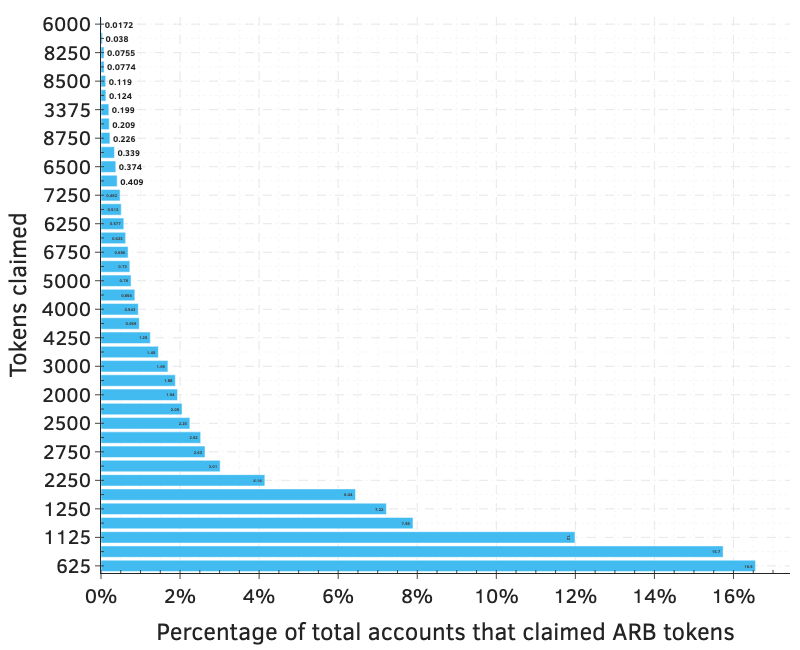

In [55]:
# Distribution of the number of tokens claimed per account
data = df.query('event_type == "HasClaimed"')[
    'tokens'].round().astype(int).value_counts(normalize=True)
data = 100 * data
print("Total ARB tokens claimed: ", df.query(
    'event_type == "HasClaimed"')['tokens'].sum())

plot_bar(data, xlabel='Percentage of total accounts that claimed ARB tokens', ylabel='Tokens claimed',
         filename='top_15_comp_holder_addresses_percentage_in_circulation.pdf',
         color=colors['blue'], precision=2,
         width=800, height=650, orientation='h', font_size=20)


In [17]:
df.query('event_type == "CanClaim"')['tokens'].round().astype(
    int).value_counts(normalize=True).head(15)


625     0.163635866180193545
875     0.152413401293649414
1125    0.113647373511892788
1250    0.087027615986661158
1750    0.086285674740038912
1625    0.060610645006059456
2250    0.044949407975948874
1875    0.028317692482252153
3250    0.026771042725193653
2750    0.024876758891626684
2500    0.020935296607509861
1500    0.020014710071570775
3750    0.019512571961058545
2000    0.018500248654929725
3000    0.015820569315176964
Name: tokens, dtype: float64

In [18]:
df.query('event_type == "HasClaimed"')['tokens'].round().astype(
    int).value_counts(normalize=True).head(15)


625     0.165584892049442794
875     0.157386272218224377
1125    0.119906362107771974
1750    0.078920335300035532
1250    0.072189227752602184
1625    0.064388427516385752
2250    0.041449265625027626
1875    0.030147652952793844
2750    0.026309135882797045
3250    0.025211153800591603
2500    0.022477691161155833
1500    0.020497433621590466
2000    0.019362321710518174
3750    0.018807142364604311
3000    0.016925897702017210
Name: tokens, dtype: float64

In [19]:
df.query('event_type == "HasClaimed"')[
    'tokens'].describe(percentiles=percentiles)


count    565583.000000000000000000
mean       1871.933694966079201549
std        1563.489111670850888913
min         625.000000000000000000
1%          625.000000000000000000
5%          625.000000000000000000
10%         625.000000000000000000
20%         875.000000000000000000
25%         875.000000000000000000
50%        1250.000000000000000000
75%        2250.000000000000000000
80%        2500.000000000000000000
90%        3750.000000000000000000
95%        5249.999999999999090505
99%        8500.000000000000000000
max       10250.000000000000000000
Name: tokens, dtype: float64

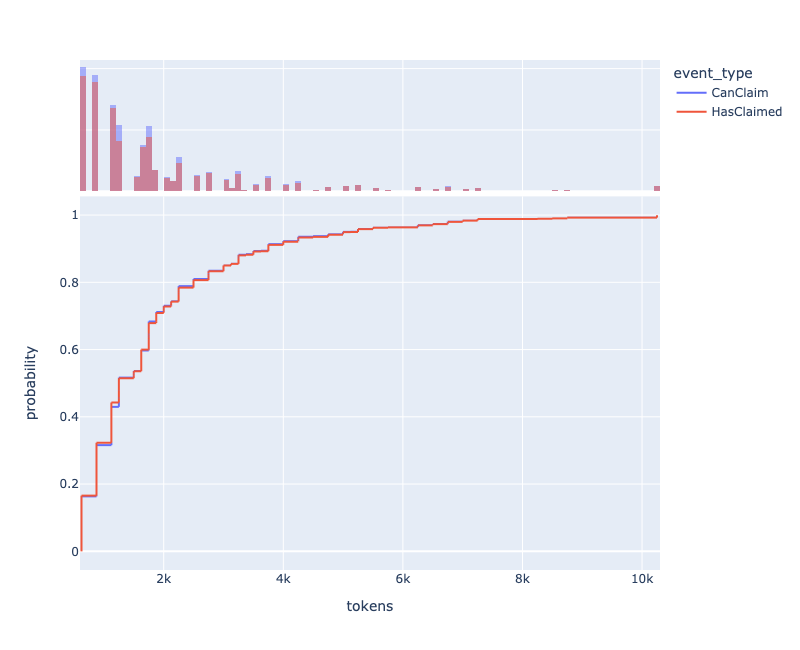

In [68]:
# Distribution of eligible and claimed tokens per account
events_of_interest = ['CanClaim', 'HasClaimed']
data = df[['event_type', 'tokens']].query('event_type in @events_of_interest')
fig = px.ecdf(data, x="tokens", color="event_type",
              width=800, height=650, marginal="histogram")
fig.show('png', width=800, height=650)


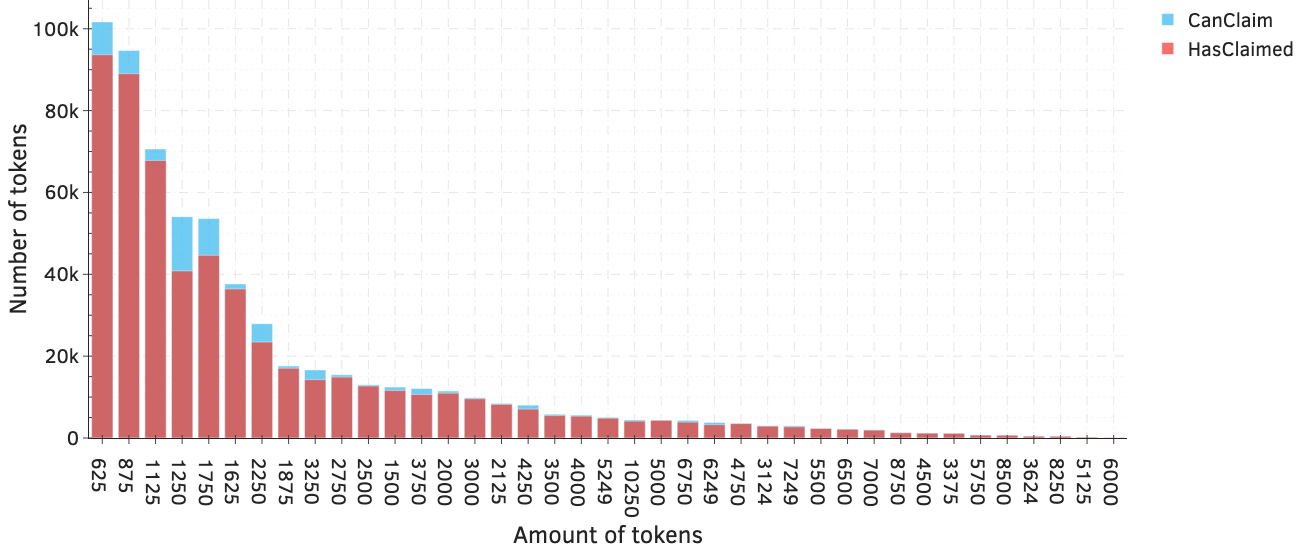

In [25]:
fig = go.Figure(layout=go.Layout(
    margin=go.layout.Margin(
        l=0,  # left margin
        r=0,  # right margin
        b=0,  # bottom margin
        t=0  # top margin
    )
))
data = df.query('event_type == "CanClaim"')[
    'tokens'].value_counts()
fig.add_trace(go.Bar(x=data.index.astype('int').astype('str'), y=data,
              name='CanClaim', marker_color=colors['blue'], opacity=0.75, orientation='v'))  # , text=data, textposition='outside', texttemplate='%{text:.4s}'))

data = df.query('event_type == "HasClaimed"')[
    'tokens'].value_counts()
fig.add_trace(go.Bar(x=data.index.astype('int').astype('str'), y=data,
              name='HasClaimed', marker_color=colors['red'], opacity=0.75, orientation='v'))  # , text=data, textposition='inside', texttemplate='%{text:.4s}'))

fig.update_layout(barmode='overlay', xaxis_title='Amount of tokens',
                  yaxis_title='Number of tokens', template='simple_white',
                  font=dict(size=20, family='Clear Sans'))
fig.update_xaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot")
fig.update_yaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot")
fig.update_traces(opacity=0.75)
fig.write_image(plots_dir+'tokens_claimed_dist.pdf',
                scale=1, width=1300, height=550)
fig.show('png', width=1300, height=550)


In [22]:
df.query('event_type == "CanClaim"').groupby('tokens').agg('account').nunique()


tokens
625.000000000000000000      101674
875.000000000000000000       94701
1125.000000000000000000      70614
1250.000000000000000000      54074
1500.000000000000000000      12436
1625.000000000000000000      37660
1750.000000000000000000      53613
1875.000000000000000000      17595
2000.000000000000000000      11495
2125.000000000000000000       8464
2250.000000000000000000      27929
2500.000000000000000000      13008
2750.000000000000000000      15457
3000.000000000000000000       9830
3124.999999999999545253       3019
3250.000000000000000000      16634
3375.000000000000454747       1180
3500.000000000000000000       5807
3624.999999999999090505        467
3750.000000000000000000      12124
4000.000000000000000000       5610
4250.000000000000000000       8036
4500.000000000000000000       1196
4750.000000000000909495       3583
5000.000000000000000000       4403
5125.000000000000000000        220
5249.999999999999090505       5048
5500.000000000000000000       2369
5750.00000000

In [23]:
df.query('event_type == "HasClaimed"').groupby(
    'tokens').agg('account').nunique()


tokens
625.000000000000000000      93652
875.000000000000000000      89015
1125.000000000000000000     67817
1250.000000000000000000     40829
1500.000000000000000000     11593
1625.000000000000000000     36417
1750.000000000000000000     44636
1875.000000000000000000     17051
2000.000000000000000000     10951
2125.000000000000000000      8209
2250.000000000000000000     23443
2500.000000000000000000     12713
2750.000000000000000000     14880
3000.000000000000000000      9573
3124.999999999999545253      2894
3250.000000000000000000     14259
3375.000000000000454747      1123
3500.000000000000000000      5480
3624.999999999999090505       438
3750.000000000000000000     10637
4000.000000000000000000      5336
4250.000000000000000000      7057
4500.000000000000000000      1181
4750.000000000000909495      3523
5000.000000000000000000      4301
5125.000000000000000000       215
5249.999999999999090505      4840
5500.000000000000000000      2315
5750.000000000000909495       702
6000.00

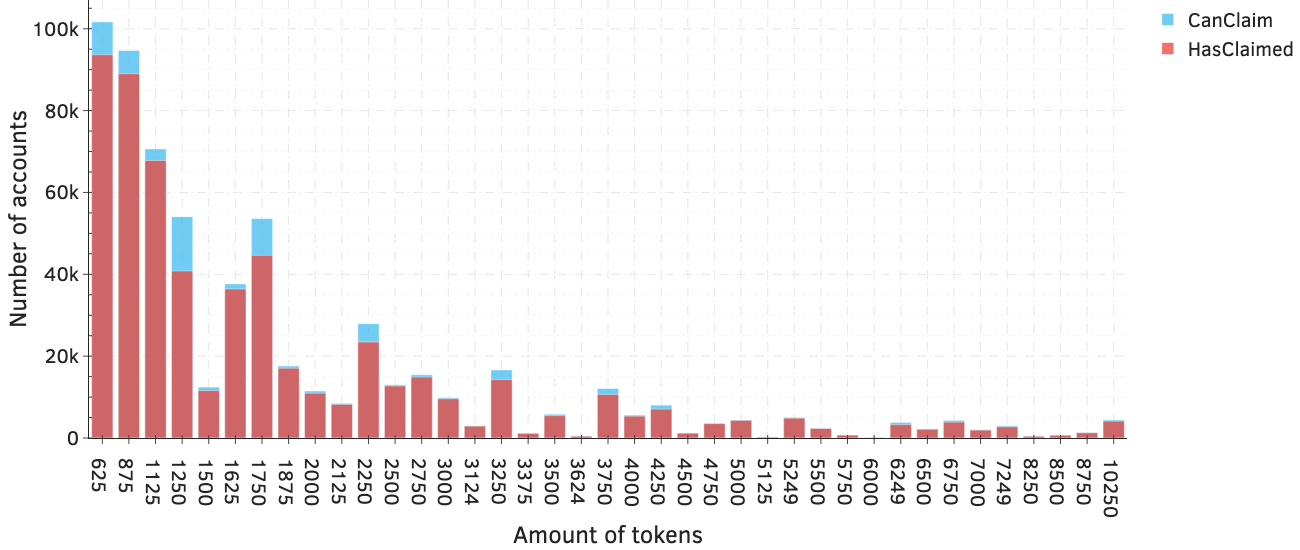

In [43]:
fig = go.Figure(layout=go.Layout(
    margin=go.layout.Margin(
        l=0,  # left margin
        r=0,  # right margin
        b=0,  # bottom margin
        t=0  # top margin
    )
))
data = df.query('event_type == "CanClaim"').groupby(
    'tokens').agg('account').nunique()
fig.add_trace(go.Bar(x=data.index.astype('int').astype('str'), y=data,
              name='CanClaim', marker_color=colors['blue'], opacity=0.75, orientation='v'))  # , text=data, textposition='outside', texttemplate='%{text:.4s}'))

data = df.query('event_type == "HasClaimed"').groupby(
    'tokens').agg('account').nunique()
fig.add_trace(go.Bar(x=data.index.astype('int').astype('str'), y=data,
              name='HasClaimed', marker_color=colors['red'], opacity=0.75, orientation='v'))  # , text=data, textposition='inside', texttemplate='%{text:.4s}'))

fig.update_layout(barmode='overlay', xaxis_title='Amount of tokens',
                  yaxis_title='Number of accounts', template='simple_white',
                  font=dict(size=20, family='Clear Sans'))
fig.update_xaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot")
fig.update_yaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot")
fig.update_traces(opacity=0.75)
fig.write_image(plots_dir+'accounts_has_claimed_dist.pdf',
                scale=1, width=1300, height=550)
fig.show('png', width=1300, height=550)


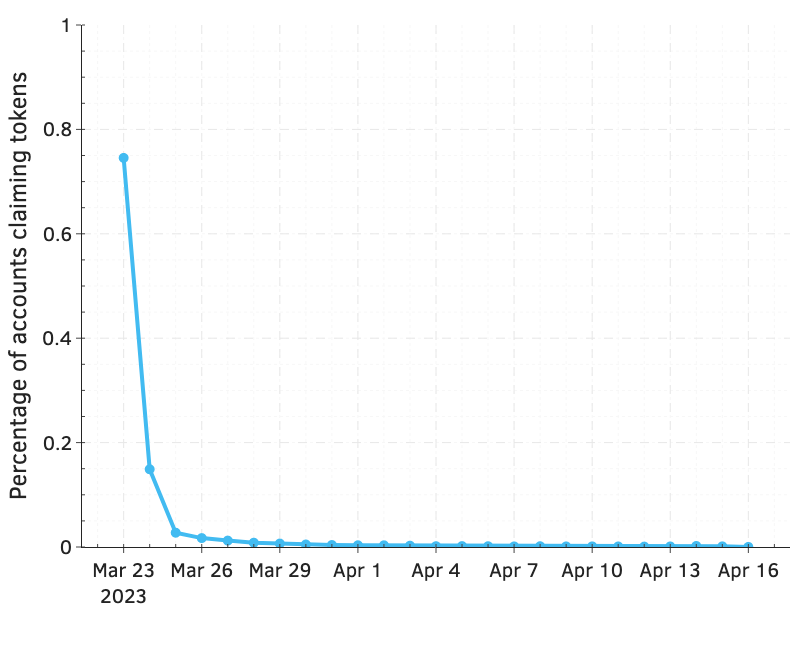

2023-03-23    0.745436125201782929
2023-03-24    0.148892381843160060
2023-03-25    0.027362915787780044
2023-03-26    0.017063808494951226
2023-03-27    0.012261683961505208
2023-03-28    0.008249894356796439
2023-03-29    0.006655079802610758
2023-03-30    0.004835718188135074
2023-03-31    0.003849125592530186
2023-04-01    0.003309859030416402
2023-04-02    0.003265656853193961
2023-04-03    0.002593783759412853
2023-04-04    0.001591278380007886
2023-04-05    0.001759246653453163
2023-04-06    0.001471048457962845
2023-04-07    0.001126271475627804
2023-04-08    0.001518786809363082
2023-04-09    0.001135111911072292
2023-04-10    0.001189922610828119
2023-04-11    0.001073228862960874
2023-04-12    0.000818624322159612
2023-04-13    0.001092677820938748
2023-04-14    0.002003242671721038
2023-04-15    0.001239429049317253
2023-04-16    0.000205098102312127
Name: timeStamp, dtype: float64

In [56]:
# Distribution of the number of accounts that claimed ARB tokens per day
data = df.query('event_type == "HasClaimed"')[
    'timeStamp'].dt.date.value_counts(normalize=True).sort_index()
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=data.index, y=data, name='HasClaimed',
                         line=dict(color=colors['blue'], width=4), mode='lines+markers', marker_size=10))
fig.update_layout(xaxis_title='', yaxis_title='Percentage of accounts claiming tokens', template='simple_white',
                  font=dict(size=20, family='Clear Sans'))
fig.update_xaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot")
fig.update_yaxes(minor_ticks="inside", showgrid=True,
                 griddash='dash', minor_griddash="dot", range=[0, 1])
fig.write_image(plots_dir+'accounts_has_claimed_daily.pdf',
                scale=1, width=800, height=650)
fig.show('png', width=800, height=650)
data
